# Tidy Data

In [1]:
library(tidyverse)

Warning message:
: package 'tidyverse' was built under R version 3.3.2Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
: package 'readr' was built under R version 3.3.2Warning message:
: package 'purrr' was built under R version 3.3.2Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
table1

,country,year,cases,population
1,Afghanistan,1999,745,19987071
2,Afghanistan,2000,2666,20595360
3,Brazil,1999,37737,172006362
4,Brazil,2000,80488,174504898
5,China,1999,212258,1272915272
6,China,2000,213766,1280428583


In [4]:
table1 %>% 
  mutate(rate = cases / population * 10000)

,country,year,cases,population,rate
1,Afghanistan,1999,745,19987071,0.372740958392553
2,Afghanistan,2000,2666,20595360,1.29446632639585
3,Brazil,1999,37737,172006362,2.19393047799011
4,Brazil,2000,80488,174504898,4.61236337331918
5,China,1999,212258,1272915272,1.66749511667419
6,China,2000,213766,1280428583,1.6694878795907


In [7]:
table1 %>% 
  count(year, wt = cases)

,year,n
1,1999,250740
2,2000,296920


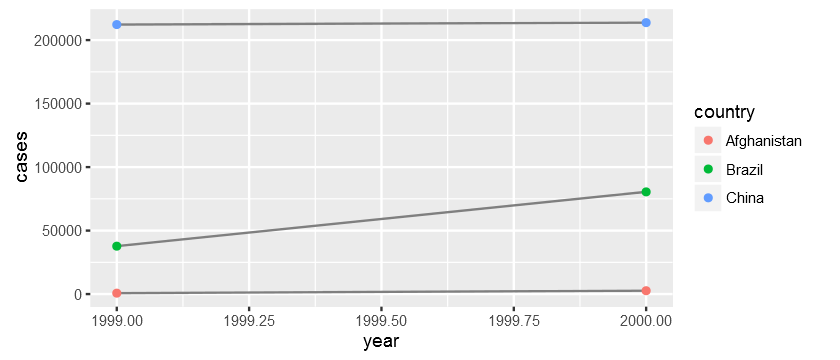

In [10]:
options(repr.plot.height=3)
ggplot(table1, aes(year, cases)) + 
  geom_line(aes(group = country), colour = "grey50") + 
  geom_point(aes(colour = country))

### 12.3.1 Gathering 

In [11]:
table4a %>% 
  gather(`1999`, `2000`, key = "year", value = "cases")

,country,year,cases
1,Afghanistan,1999,745
2,Brazil,1999,37737
3,China,1999,212258
4,Afghanistan,2000,2666
5,Brazil,2000,80488
6,China,2000,213766


In [12]:
table4b %>% 
  gather(`1999`, `2000`, key = "year", value = "population")

,country,year,population
1,Afghanistan,1999,19987071
2,Brazil,1999,172006362
3,China,1999,1272915272
4,Afghanistan,2000,20595360
5,Brazil,2000,174504898
6,China,2000,1280428583


In [13]:
tidy4a <- table4a %>% 
  gather(`1999`, `2000`, key = "year", value = "cases")
tidy4b <- table4b %>% 
  gather(`1999`, `2000`, key = "year", value = "population")
left_join(tidy4a, tidy4b)

Joining, by = c("country", "year")


,country,year,cases,population
1,Afghanistan,1999,745,19987071
2,Brazil,1999,37737,172006362
3,China,1999,212258,1272915272
4,Afghanistan,2000,2666,20595360
5,Brazil,2000,80488,174504898
6,China,2000,213766,1280428583
